<a href="https://colab.research.google.com/github/Mutasar/Membangun-Proyek-Machine-Learning/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Mutasar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [ ]:
#Type your code here

import pandas as pd
import matplotlib.pyplot as plt
import joblib
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 10 baris pertama dengan function `head()`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info()`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe()`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [ ]:
# Tampilkan 10 baris pertama dengan function head.
df = pd.read_csv('https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m')
print(df.head(10))

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   
5      TX000006   AC00393              92.15  2023-04-03 17:15:01   
6      TX000007   AC00199               7.08  2023-02-15 16:36:48   
7      TX000008   AC00069             171.42  2023-05-08 17:47:59   
8      TX000009   AC00135             106.23  2023-03-21 16:59:46   
9      TX000010   AC00385             815.96  2023-03-31 16:06:57   

  TransactionType       Location DeviceID       IP Address MerchantID Channel  \
0           Debit      San Diego  D000380   162.198.218.92       M015     ATM   
1           Debit        Houston  D000051      13.149.61.4       M052     ATM 

In [ ]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [ ]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe

print(df.describe())

       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2511.000000  2519.000000          2511.000000    2516.000000   
mean          297.656468    44.678444           119.422939       1.121622   
std           292.230367    17.837359            70.078513       0.594469   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.310000    27.000000            63.000000       1.000000   
50%           211.360000    45.000000           112.000000       1.000000   
75%           413.105000    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2510.000000  
mean      5113.438124  
std       3897.975861  
min        101.250000  
25%       1504.727500  
50%       4734.110000  
75%       7672.687500  
max      14977.990000  


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

In [ ]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [ ]:
# Mengecek dataset menggunakan isnull().sum()

null_values = df.isnull().sum()
print(null_values)

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [ ]:
# Mengecek dataset menggunakan duplicated().sum()

duplicate_rows = df.duplicated().sum()
print(duplicate_rows)

21


In [ ]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.

# Memilih fitur numerik
X = df.select_dtypes(include=['float64', 'int64'])

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Melakukan scaling
X_scaled = scaler.fit_transform(X)

# Mengubah hasil scaling kembali ke DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print(df_scaled.head())

   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0           0.007207     0.838710             0.244828            0.0   
1           0.195940     0.806452             0.451724            0.0   
2           0.065680     0.016129             0.158621            0.0   
3           0.096016     0.129032             0.051724            0.0   
4           0.006874          NaN             0.648276            0.0   

   AccountBalance  
0        0.336832  
1        0.918055  
2        0.068637  
3        0.569198  
4        0.492591  


In [ ]:
# Melakukan feature encoding menggunakan pd.get_dummies() atau LabelEncoder() untuk fitur kategorikal.

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Memilih kolom kategorikal untuk encoding
categorical_columns = ['TransactionType']  # Gantilah dengan nama kolom yang sesuai

# Melakukan encoding
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

print(df.head())

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

   TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0                1  San Diego  D000380  162.198.218.92       M015     ATM   
1                1    Houston  D000051     13.149.61.4       M052     ATM   
2                1       Mesa  D000235  215.97.143.157       M009  Online   
3                1    Raleigh  D000187  200.13.225.150       M002  Online   
4                0    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             Doctor                

In [ ]:
# Melakukan drop pada kolom yang memiliki keterangan id

# Menampilkan kolom yang ada
print("Kolom sebelum drop:")
print(df.columns)

# Menghapus kolom yang memiliki 'ID' dalam namanya
df_dropped = df.drop(columns=[col for col in df.columns if 'ID' in col])

# Menampilkan kolom setelah drop
print("\nKolom setelah drop:")
print(df_dropped.columns)

# Menyimpan data yang sudah diproses jika diperlukan
df_dropped.to_csv('bank_transactions_cleaned.csv', index=False)

Kolom sebelum drop:
Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

Kolom setelah drop:
Index(['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location',
       'IP Address', 'Channel', 'CustomerAge', 'CustomerOccupation',
       'TransactionDuration', 'LoginAttempts', 'AccountBalance',
       'PreviousTransactionDate'],
      dtype='object')


(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

In [ ]:
# Menghapus data duplikat menggunakan drop_duplicates().

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

In [ ]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder atau get_dummies.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [ ]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()

df_dropped.describe()

,TransactionAmount,TransactionType,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2537.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,0.789121,44.678444,119.422939,1.121622,5113.438124
std,292.230367,0.436044,17.837359,70.078513,0.594469,3897.975861
min,0.260000,0.000000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,1.000000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,1.000000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,1.000000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,2.000000,80.000000,300.000000,5.000000,14977.990000


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:

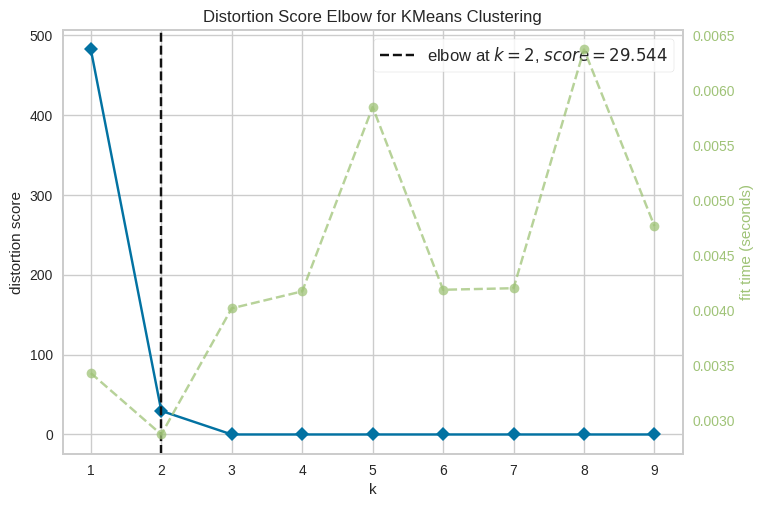

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

# Menggunakan fitur tertentu dari data_dropped (hanya kolom numerik)
X = df_dropped.select_dtypes(include='number')

# Menghapus kolom yang tidak diperlukan (misalnya, jika ada kolom kosong)
X = X.dropna(axis=1, how='any')

# Inisialisasi model KMeans
model = KMeans()

# Visualisasi Elbow Method
visualizer = KElbowVisualizer(model, k=(1, 10))
visualizer.fit(X)
visualizer.show()

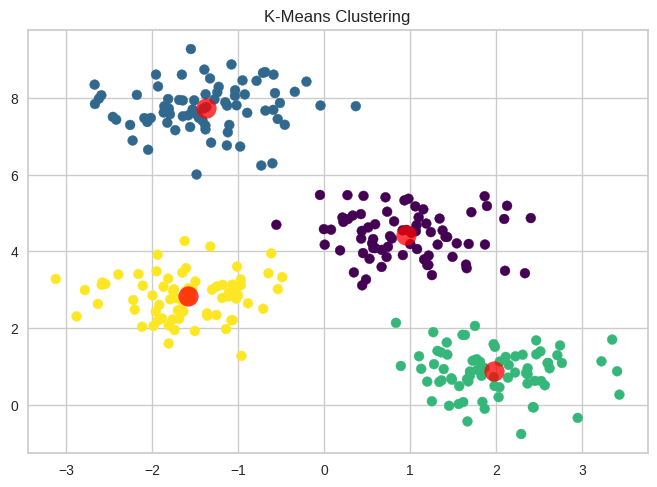

In [ ]:
# Menggunakan algoritma K-Means Clustering

# Membuat dataset
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Menggunakan K-Means
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(X)

# Visualisasi hasil
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title('K-Means Clustering')
plt.show()

Jalankan cell code ini untuk menyimpan model kamu.

In [ ]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")

# Membuat dataset
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Menggunakan K-Means
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Menyimpan model
loaded_model = joblib.load("model_clustering.h5")
joblib.dump(kmeans, "model_clustering.h5")




['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.

In [ ]:
# Membuat visualisasi hasil clustering

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Membangun model menggunakan PCA.

In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [ ]:
# Menampilkan analisis deskriptif minimal mean untuk fitur numerik dan modus untuk fitur kategorikal.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

# Fitur numerik
numeric_df = df.select_dtypes(include='number')
numeric_summary = numeric_df.agg(['mean', 'median', 'std', 'min', 'max', 'count'])

# Fitur kategorikal
categorical_df = df.select_dtypes(include='object')
mode = categorical_df.mode().iloc[0]
count = categorical_df.count()
unique = categorical_df.nunique()

# Gabungkan hasil kategorikal dalam DataFrame
categorical_summary = pd.DataFrame({
    'mode': mode,
    'count': count,
    'unique': unique
})

# Tampilkan hasil
print("Statistik deskriptif untuk fitur numerik:")
print(numeric_summary.T)

print("\nStatistik deskriptif untuk fitur kategorikal:")
print(categorical_summary)

Statistik deskriptif untuk fitur numerik:
                            mean   median          std     min       max  \
TransactionAmount     297.656468   211.36   292.230367    0.26   1919.11   
TransactionType         0.789121     1.00     0.436044    0.00      2.00   
CustomerAge            44.678444    45.00    17.837359   18.00     80.00   
TransactionDuration   119.422939   112.00    70.078513   10.00    300.00   
LoginAttempts           1.121622     1.00     0.594469    1.00      5.00   
AccountBalance       5113.438124  4734.11  3897.975861  101.25  14977.99   

                      count  
TransactionAmount    2511.0  
TransactionType      2537.0  
CustomerAge          2519.0  
TransactionDuration  2511.0  
LoginAttempts        2516.0  
AccountBalance       2510.0  

Statistik deskriptif untuk fitur kategorikal:
                                        mode  count  unique
TransactionID                       TX000026   2508    2484
AccountID                            AC00202   2

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (age: 25–40, salary: 50.000–80.000)**:
  - **Rata-rata (mean) <Fitur>:**
              
               age: 30.83 tahun
               salary: 61.666

  - **Analisis:** Cluster ini mencerminkan kelompok karyawan dengan usia dewasa awal hingga menengah, berkisar antara 25 hingga 40 tahun, dengan rata-rata usia sekitar 31 tahun.Dari sisi penghasilan, mereka memiliki gaji menengah ke atas (rata-rata sekitar 61.666, dengan batas bawah 50.000 dan atas 80.000).Dominasi kategori department pada cluster ini adalah HR, yang berarti sebagian besar anggota cluster ini berasal dari departemen HR, walaupun ada total 3 jenis departemen yang berbeda dalam data. Kesimpulan sementara: Cluster ini kemungkinan terdiri dari profesional berpengalaman di tingkat middle-level, dengan fokus di bidang HR. Mereka bukan pemula, tapi juga belum senior tingkat tinggi — posisi mereka cenderung stabil dengan kompensasi cukup baik.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

df.rename(columns={'cluster': 'Target'}, inplace=True)

In [ ]:
print(df.columns)

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')


In [ ]:
print(df.head())

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

   TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0                1  San Diego  D000380  162.198.218.92       M015     ATM   
1                1    Houston  D000051     13.149.61.4       M052     ATM   
2                1       Mesa  D000235  215.97.143.157       M009  Online   
3                1    Raleigh  D000187  200.13.225.150       M002  Online   
4                0    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             Doctor                

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)

df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)